# COLLEGE DATA 예제

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 파일열기
college = pd.read_csv('/content/College.csv')
college.head()
college.columns

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
# 학교이름 인덱스로 만들기
college.set_index('Unnamed: 0', inplace=True)
college.head()

In [ ]:
# 데이터 검사
college.head()
college.tail()
college.shape #777데이터에 변수는 18개
college.dtypes #private은 인코딩이 필요함
college.describe() #기초통계
college.isna().sum() #널값 체크

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

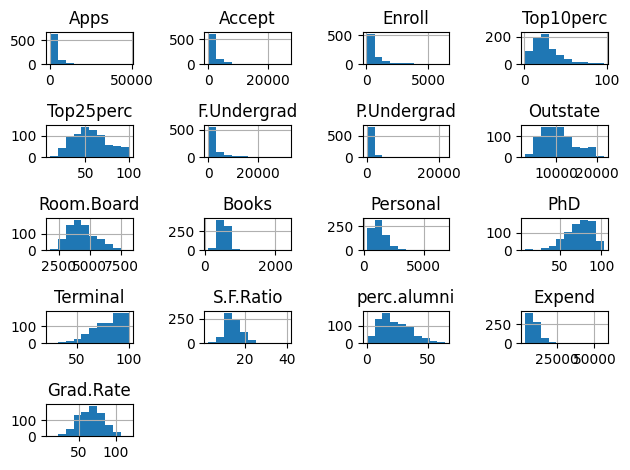

In [ ]:
# PRELIMINARY ANALYSIS
# 단변량 분석 (히스토그램, 박스플랏)
college.hist()
plt.tight_layout()
plt.show()

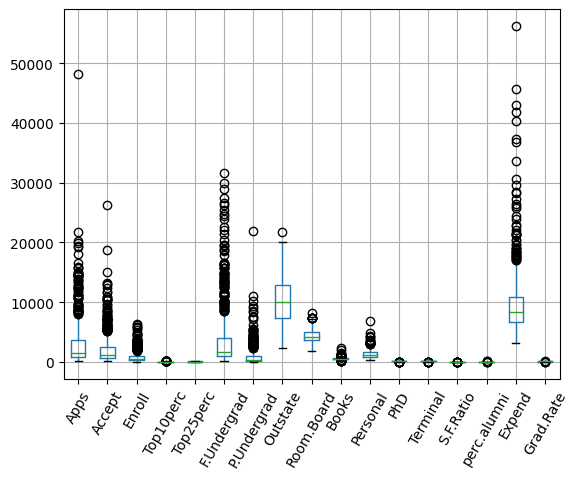

In [ ]:
college.boxplot() #scaling이 필요
plt.xticks(rotation=60)
plt.show()

<Axes: xlabel='Private', ylabel='count'>

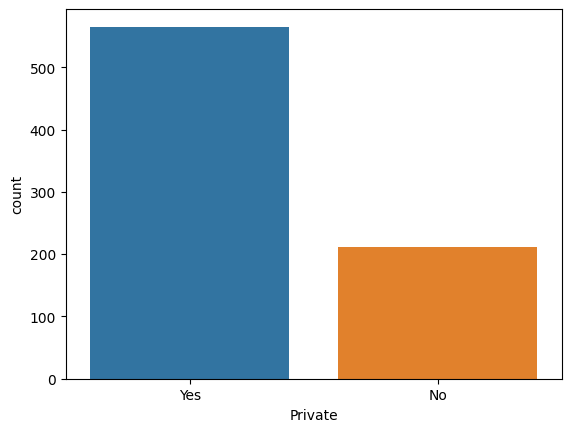

In [ ]:
sns.countplot(x=college.Private) #resampling 필요

In [ ]:
# 다변량 분석 (산점도, 상관관계)
sns.pairplot(college, hue='Private')

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x78e7283f6050> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x78e7283f52d0> (for post_execute):


KeyboardInterrupt: ignored

<ipython-input-44-2f8b98e670ff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(college.corr(), annot=True)


<Axes: >

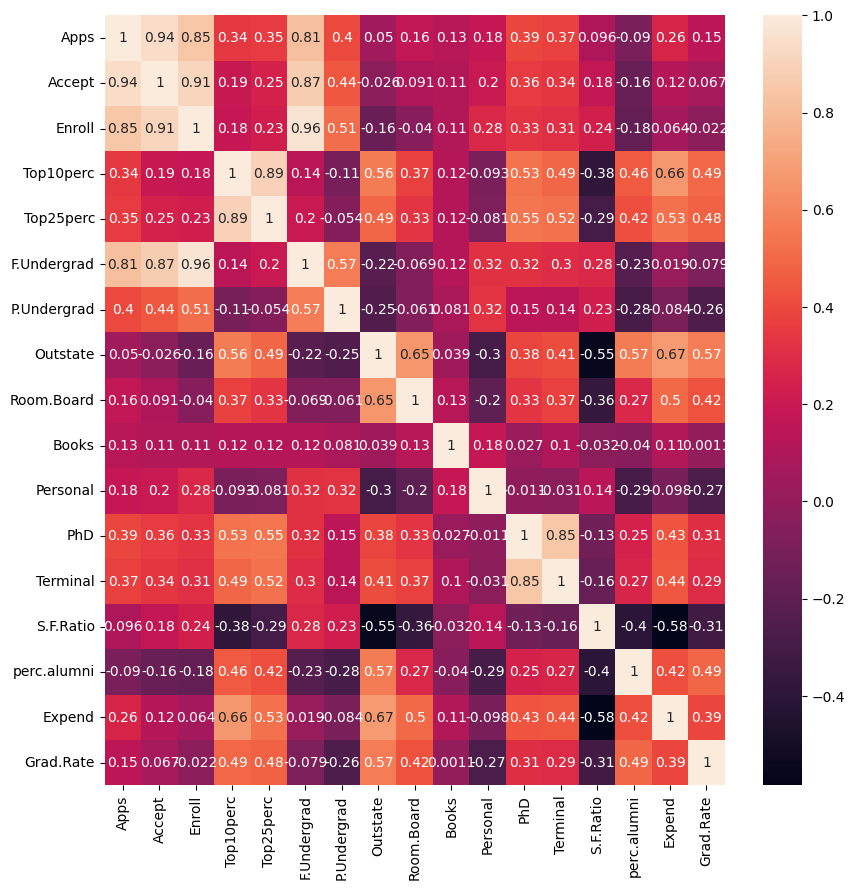

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(college.corr(), annot=True)

In [ ]:
# x and y split
y = college.Private #인코딩
x = college.drop('Private', axis=1) #scaling

In [ ]:
# y값 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['No', 'Yes'], dtype=object)

<Axes: >

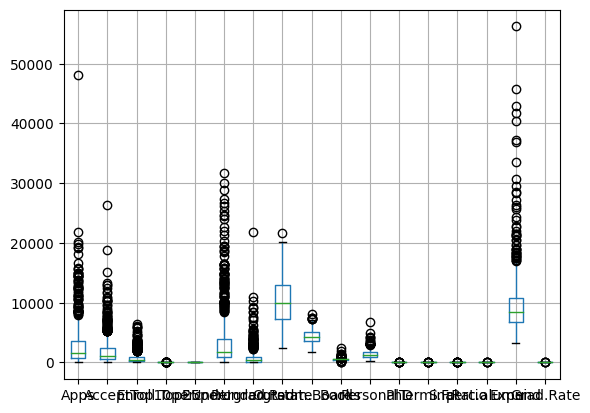

In [ ]:
# x값 스케일링
x.boxplot()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

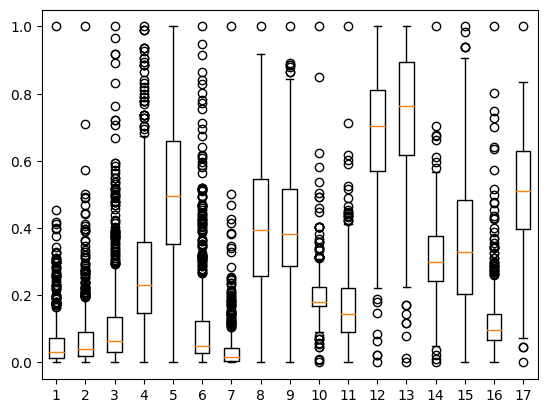

In [ ]:
plt.boxplot(x_scaled)
plt.show()

In [ ]:
# train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=.2, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((621, 17), (156, 17), (621,), (156,))

<Axes: ylabel='count'>

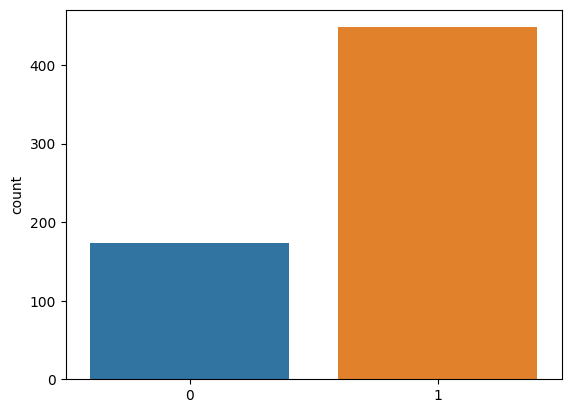

In [ ]:
# oversampling
sns.countplot(x=y_train)

<Axes: ylabel='count'>

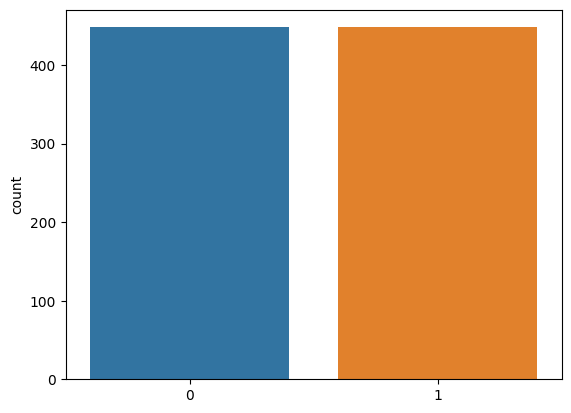

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train, y_train)
sns.countplot(x=y_smote)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500)
mlp.fit(x_smote, y_smote) #학습

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=500)

In [ ]:
# 정확도를 계산
mlp.score(x_test, y_test) #mlp.score(x_test, y_test)

0.9294871794871795

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

<Axes: >

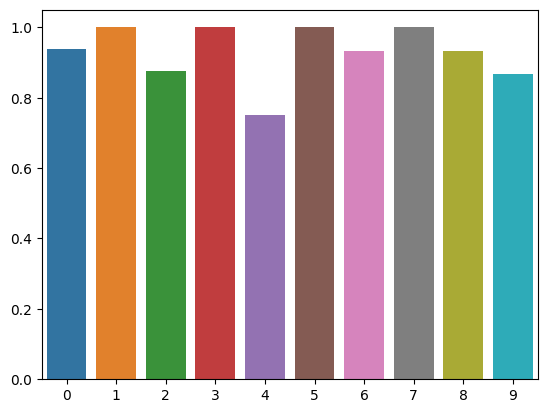

In [ ]:
# 교차검증
from sklearn.model_selection import cross_val_score
mlp_cv = cross_val_score(mlp, x_test, y_test, scoring='accuracy', cv=10)
sns.barplot(x=np.arange(10), y=mlp_cv)

Text(0.5, 23.52222222222222, 'predicted')

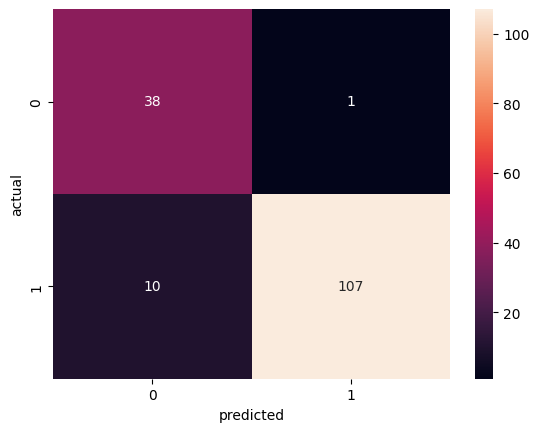

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
sns.heatmap(confusion_matrix(y_test, mlp.predict(x_test)), annot=True, fmt='g')
plt.ylabel('actual')
plt.xlabel('predicted')

In [ ]:
# 분류보고서
print(classification_report(y_test, mlp.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        39
           1       0.99      0.91      0.95       117

    accuracy                           0.93       156
   macro avg       0.89      0.94      0.91       156
weighted avg       0.94      0.93      0.93       156



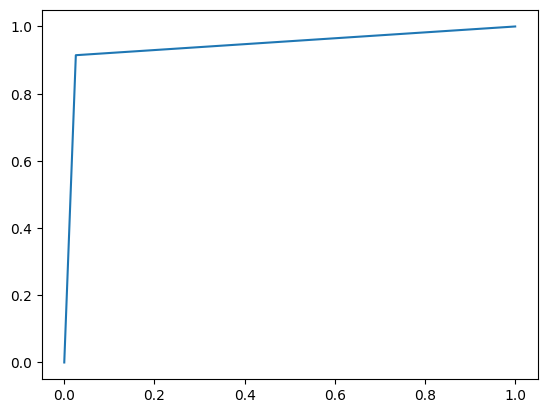

In [ ]:
# ROC Curve
fpr, tpr, threshods = roc_curve(y_test, mlp.predict(x_test))
plt.plot(fpr, tpr)
plt.show()

In [ ]:
# 테스트 데이터 만들어서 예측
test_data = college.iloc[0, 1:]
test_data_scaled = scaler.transform(test_data.values.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
mlp.predict(test_data_scaled) #공립대학이라고 예측함

array([0])

# COLLEGE DATA 신경망 예제

In [ ]:
# !pip install tensorflow
# !pip install keras

In [ ]:
# 신경망 모델 구축
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(10, input_dim=x_train.shape[1],
activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_smote, y_smote, epochs=500, validation_data=(x_test, y_test)) #학습

Epoch 1/500
28/28 [==============================] - 2s 12ms/step - loss: 0.6731 - accuracy: 0.5022 - val_loss: 0.7040 - val_accuracy: 0.2628
Epoch 2/500
28/28 [==============================] - 0s 4ms/step - loss: 0.6479 - accuracy: 0.5603 - val_loss: 0.6748 - val_accuracy: 0.5769
Epoch 3/500
28/28 [==============================] - 0s 4ms/step - loss: 0.6134 - accuracy: 0.7299 - val_loss: 0.6401 - val_accuracy: 0.7308
Epoch 4/500
28/28 [==============================] - 0s 3ms/step - loss: 0.5619 - accuracy: 0.8281 - val_loss: 0.5977 - val_accuracy: 0.7821
Epoch 5/500
28/28 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.8616 - val_loss: 0.5279 - val_accuracy: 0.9038
Epoch 6/500
28/28 [==============================] - 0s 4ms/step - loss: 0.4326 - accuracy: 0.8940 - val_loss: 0.4435 - val_accuracy: 0.9423
Epoch 7/500
28/28 [==============================] - 0s 4ms/step - loss: 0.3566 - accuracy: 0.9118 - val_loss: 0.3696 - val_accuracy: 0.9295
Epoch 8/500


In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.3068 - accuracy: 0.9359


[0.30680930614471436, 0.9358974099159241]

In [ ]:
model.predict(x_test).round()

5/5 [==============================] - 0s 3ms/step


array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],

# MNIST 신경망 예제

In [ ]:
import tensorflow as tf
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape
x_train.ndim
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<Axes: >

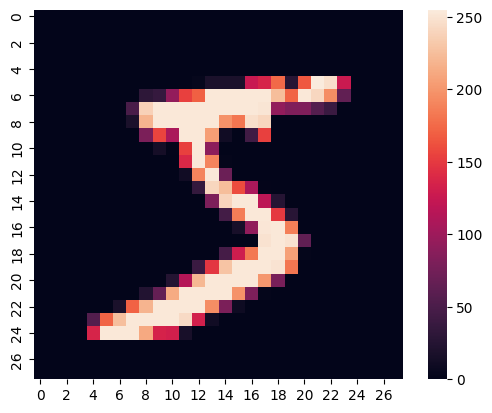

In [ ]:
plt.imshow(x_train[0])
sns.heatmap(x_train[0])

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.4376 - accuracy: 0.7604 - val_loss: 0.5777 - val_accuracy: 0.8792
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5790 - accuracy: 0.8494 - val_loss: 0.3523 - val_accuracy: 0.9127
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4623 - accuracy: 0.8781 - val_loss: 0.3119 - val_accuracy: 0.9212
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4135 - accuracy: 0.8890 - val_loss: 0.3431 - val_accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3872 - accuracy: 0.8967 - val_loss: 0.2617 - val_accuracy: 0.9335
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3769 - accuracy: 0.9018 - val_loss: 0.2901 - val_accuracy: 0.9311
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3485 - accuracy: 0.9086 - val_loss: 0.2732 - val_accurac

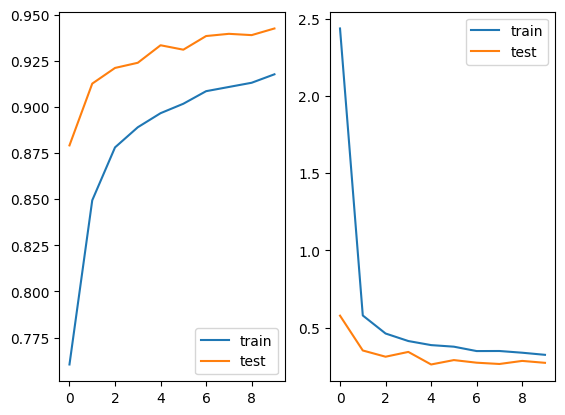

In [ ]:
# epochs에 따른 정확도 그래프
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
model.